In [1]:
import requests
from bs4 import BeautifulSoup
import re

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = 'https://github.com/geoschem/cloud_GC/issues/15'

page = requests.get(URL)
page

<Response [200]>

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
#print(soup.prettify())

In [5]:
class_to_search = 'd-block comment-body markdown-body js-comment-body'  # only the content

all_comments = soup.find_all('td', class_=class_to_search)[1:]
len(all_comments)

23

In [6]:
all_comments[0]

<td class="d-block comment-body markdown-body js-comment-body">
<p>Here's a sample reply:</p>
<p>Background: XX University, XX department, Graduate Student<br/>
GEOS-Chem experience: X years<br/>
Step 1: X minutes<br/>
Step 2: X minutes<br/>
Step 3: X minutes<br/>
Step 4: X minutes<br/>
General feedback: None</p>
</td>

In [7]:
items = ['GEOS-Chem experience: ', 'Step 1: ', 'Step 2: ', 'Step 3: ', 'Step 4: ']
re_list = [re.compile(txt) for txt in items]

n_comments = len(all_comments)
n_items = len(items)

In [8]:
result = np.empty([n_comments-1, n_items], dtype='object')

for i in range(n_comments-1):
    for j in range(n_items):
        # 
        try:
            text = all_comments[i+1].find(text=re_list[j])
            text = text.strip().replace(items[j], '')
            # text = text.split()[0]
            result[i, j] = text
        except:
            print('failed:', i, j)

In [9]:
df = pd.DataFrame(result, columns=[item[:-2] for item in items])
df 

,GEOS-Chem experience,Step 1,Step 2,Step 3,Step 4
0,4 years,6 minutes,6 minutes,5 minutes (not including wait time for GEOS-Ch...,9 minutes
1,1 year,10 minutes,1.5 minutes,3 minutes,13 minutes
2,7 years,5 minutes,"6 minutes, wait 1 hour for account verificatio...",7 minutes,34 minutes
3,20+ years,5 minutes,5 minutes,5 minutes,16 minutes
4,5 years,4 minutes,"5 minutes, wait ~ half hour for verification",7 minutes,"8 minutes, a little bit confusion in activate ..."
5,9 months,10 minutes,7 minutes,3 minutes,2 minutes
6,Ran for undergrad thesis,5 minutes,6 minutes,4 minutes,6 minutes
7,6 years,10 minutes,30 minutes (had to wait for account verification),5 minutes,15 minutes
8,7 years,7 minutes,5 minutes (takes ~ 1hour for account verificat...,3 minutes,8 minutes
9,None,5 minutes,6 minutes,4 minutes,6 minutes


In [10]:
selected_idx = list(range(14)) + [19]  # only choose people in Harvard ACMG 
df = df.iloc[selected_idx]
df

,GEOS-Chem experience,Step 1,Step 2,Step 3,Step 4
0,4 years,6 minutes,6 minutes,5 minutes (not including wait time for GEOS-Ch...,9 minutes
1,1 year,10 minutes,1.5 minutes,3 minutes,13 minutes
2,7 years,5 minutes,"6 minutes, wait 1 hour for account verificatio...",7 minutes,34 minutes
3,20+ years,5 minutes,5 minutes,5 minutes,16 minutes
4,5 years,4 minutes,"5 minutes, wait ~ half hour for verification",7 minutes,"8 minutes, a little bit confusion in activate ..."
5,9 months,10 minutes,7 minutes,3 minutes,2 minutes
6,Ran for undergrad thesis,5 minutes,6 minutes,4 minutes,6 minutes
7,6 years,10 minutes,30 minutes (had to wait for account verification),5 minutes,15 minutes
8,7 years,7 minutes,5 minutes (takes ~ 1hour for account verificat...,3 minutes,8 minutes
9,None,5 minutes,6 minutes,4 minutes,6 minutes


In [11]:
df_num = df.drop('GEOS-Chem experience', axis=1).applymap(lambda s: float(s.split()[0]))
df_num['total'] = df_num.sum(axis=1)
df_num 

,Step 1,Step 2,Step 3,Step 4,total
0,6.0,6.0,5.0,9.0,26.0
1,10.0,1.5,3.0,13.0,27.5
2,5.0,6.0,7.0,34.0,52.0
3,5.0,5.0,5.0,16.0,31.0
4,4.0,5.0,7.0,8.0,24.0
5,10.0,7.0,3.0,2.0,22.0
6,5.0,6.0,4.0,6.0,21.0
7,10.0,30.0,5.0,15.0,60.0
8,7.0,5.0,3.0,8.0,23.0
9,5.0,6.0,4.0,6.0,21.0


In [12]:
df_num.shape

(15, 5)

([<matplotlib.axis.XTick at 0x1a1fe5eac8>,
 <a list of 4 Text xticklabel objects>)

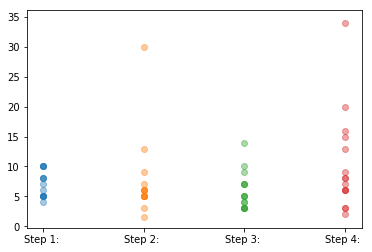

In [13]:
xx = np.ones(df_num.shape[0])

for i in range(4):
    plt.scatter(xx*(i+1), df_num.iloc[:,i], alpha=0.4)
    
plt.xticks([1,2,3,4], items[1:])

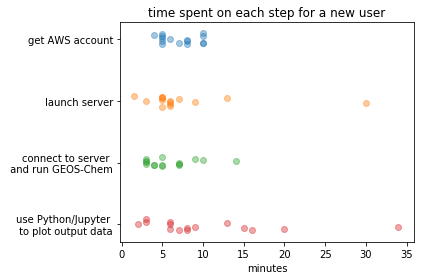

In [14]:
xx = np.ones(df_num.shape[0])

for i in range(4):
    plt.scatter(df_num.iloc[:,i], xx*(4-i)+(np.random.rand(df_num.shape[0])-0.5)*0.2, alpha=0.4)
    
plt.yticks([1,2,3,4], ['get AWS account', 'launch server', 'connect to server \n and run GEOS-Chem', 
                       'use Python/Jupyter \n to plot output data'][::-1])
plt.xlabel('minutes')
plt.title('time spent on each step for a new user')
plt.tight_layout()
#plt.savefig('user-survey.png', dpi=200)

In [15]:
df_for_sns = df_num.iloc[:,0:5].stack().reset_index().rename({'level_0': 'sample', 'level_1': 'step', 0: 'minutes'}, axis='columns')
df_for_sns.head()

,sample,step,minutes
0,0,Step 1,6.0
1,0,Step 2,6.0
2,0,Step 3,5.0
3,0,Step 4,9.0
4,0,total,26.0


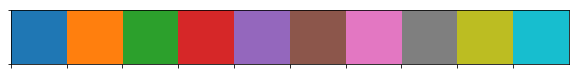

In [16]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [17]:
palette = current_palette.copy()

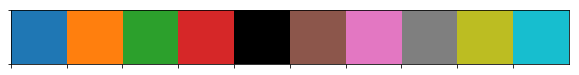

In [18]:
palette[4] = (0, 0, 0)
sns.palplot(palette)

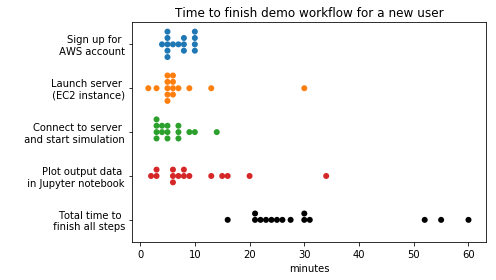

In [19]:
fig, ax = plt.subplots(1, 1, figsize=[7, 4])
sns.swarmplot(x='minutes', y='step', data=df_for_sns, s=6, ax=ax, palette=palette)

plt.yticks(range(5), ['Sign up for \n AWS account', 
                      'Launch server \n (EC2 instance)', 
                      'Connect to server \n and start simulation', 
                      'Plot output data \n in Jupyter notebook',
                      'Total time to \n finish all steps'])
plt.ylabel(' ')

plt.title('Time to finish demo workflow for a new user')
plt.tight_layout()
plt.savefig('user-survey.png', dpi=300)